In [2]:
import pandas as pd

In [3]:
f2 = pd.read_csv("MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")

In [7]:
f2.columns

Index(['transit_timestamp', 'station_complex_id', 'station_complex', 'borough',
       'routes', 'payment_method', 'ridership', 'transfers', 'latitude',
       'longitude', 'Georeference', 'itsuid'],
      dtype='object')

In [8]:


# Convert string to datetime format
f2['transit_timestamp'] = pd.to_datetime(f2['transit_timestamp'])

# Add a column for the day of the week
f2['day'] = f2['transit_timestamp'].dt.day_name()

f2

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid,day
0,2022-08-04 04:00:00,H007,1 Av (L),M,L,omny,11,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-08-04T04:00:00H0071 Av (L)MLomny,Thursday
1,2023-02-13 03:00:00,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-02-13T03:00:00H0071 Av (L)MLomny,Monday
2,2023-03-08 04:00:00,H007,1 Av (L),M,L,omny,4,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-08T04:00:00H0071 Av (L)MLomny,Wednesday
3,2023-03-23 03:00:00,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-23T03:00:00H0071 Av (L)MLomny,Thursday
4,2023-04-03 05:00:00,H007,1 Av (L),M,L,omny,28,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-04-03T05:00:00H0071 Av (L)MLomny,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763900,2023-01-17 14:00:00,R419,Zerega Av (6),BX,6,metrocard,54,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-01-17T14:00:00R419Zerega Av (6)BX6metrocard,Tuesday
11763901,2023-09-05 13:00:00,R419,Zerega Av (6),BX,6,metrocard,104,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-09-05T13:00:00R419Zerega Av (6)BX6metrocard,Tuesday
11763902,2023-01-15 19:00:00,R419,Zerega Av (6),BX,6,metrocard,6,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-01-15T19:00:00R419Zerega Av (6)BX6metrocard,Sunday
11763903,2022-10-01 07:00:00,R419,Zerega Av (6),BX,6,omny,18,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2022-10-01T07:00:00R419Zerega Av (6)BX6omny,Saturday


In [10]:
for day in f2['day'].unique():
    filtered_df = f2[f2['day'] == day]
    filtered_df.to_csv(f"{day}.csv", index=False)

In [ ]:
df = f2

# Convert string to datetime format
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])

# Extract the date and check for duplicates
df['date'] = df['transit_timestamp'].dt.date
duplicated_dates = df['date'][df['date'].duplicated(keep='first')]

# Filter rows with the same date but different time
filtered_df = df[df['date'].isin(duplicated_dates) & (df['transit_timestamp'].dt.time != pd.to_datetime('04:00:00 AM').time)]

In [24]:
import pandas as pd
wed = pd.read_csv("Wednesday.csv")

In [30]:
wed[wed['station_complex'].str.startswith("137")]

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid,day
87608,2022-10-19 09:00:00,R176,137 St-City College (1),M,1,metrocard,387,0,40.822006,-73.953674,POINT (-73.95367431640625 40.82200622558594),2022-10-19T09:00:00R176137 St-City College (1)...,Wednesday
87609,2022-06-01 11:00:00,R176,137 St-City College (1),M,1,omny,103,0,40.822006,-73.953674,POINT (-73.95367431640625 40.82200622558594),2022-06-01T11:00:00R176137 St-City College (1)...,Wednesday
87614,2022-06-08 07:00:00,R176,137 St-City College (1),M,1,metrocard,696,4,40.822006,-73.953674,POINT (-73.95367431640625 40.82200622558594),2022-06-08T07:00:00R176137 St-City College (1)...,Wednesday
87616,2022-05-18 16:00:00,R176,137 St-City College (1),M,1,metrocard,385,3,40.822006,-73.953674,POINT (-73.95367431640625 40.82200622558594),2022-05-18T16:00:00R176137 St-City College (1)...,Wednesday
87617,2022-11-02 19:00:00,R176,137 St-City College (1),M,1,metrocard,239,1,40.822006,-73.953674,POINT (-73.95367431640625 40.82200622558594),2022-11-02T19:00:00R176137 St-City College (1)...,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94351,2022-11-09 04:00:00,R176,137 St-City College (1),M,1,omny,15,0,40.822006,-73.953674,POINT (-73.95367431640625 40.82200622558594),2022-11-09T04:00:00R176137 St-City College (1)...,Wednesday
94354,2023-09-27 05:00:00,R176,137 St-City College (1),M,1,metrocard,500,0,40.822006,-73.953674,POINT (-73.95367431640625 40.82200622558594),2023-09-27T05:00:00R176137 St-City College (1)...,Wednesday
94355,2023-08-16 19:00:00,R176,137 St-City College (1),M,1,omny,333,3,40.822006,-73.953674,POINT (-73.95367431640625 40.82200622558594),2023-08-16T19:00:00R176137 St-City College (1)...,Wednesday
94356,2023-05-24 21:00:00,R176,137 St-City College (1),M,1,metrocard,69,0,40.822006,-73.953674,POINT (-73.95367431640625 40.82200622558594),2023-05-24T21:00:00R176137 St-City College (1)...,Wednesday


In [26]:
wed[wed['station_complex_id']=='H023']

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid,day
329,2023-07-12 04:00:00,H023,DeKalb Av (L),BK,L,omny,60,0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781),2023-07-12T04:00:00H023DeKalb Av (L)BKLomny,Wednesday
330,2023-08-02 19:00:00,H023,DeKalb Av (L),BK,L,omny,600,0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781),2023-08-02T19:00:00H023DeKalb Av (L)BKLomny,Wednesday
331,2023-08-09 23:00:00,H023,DeKalb Av (L),BK,L,omny,108,0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781),2023-08-09T23:00:00H023DeKalb Av (L)BKLomny,Wednesday
332,2023-09-06 04:00:00,H023,DeKalb Av (L),BK,L,omny,56,0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781),2023-09-06T04:00:00H023DeKalb Av (L)BKLomny,Wednesday
968780,2022-04-13 06:00:00,H023,DeKalb Av (L),BK,L,omny,216,9,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781),2022-04-13T06:00:00H023DeKalb Av (L)BKLomny,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975869,2022-09-21 15:00:00,H023,DeKalb Av (L),BK,L,omny,151,5,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781),2022-09-21T15:00:00H023DeKalb Av (L)BKLomny,Wednesday
975870,2022-05-25 14:00:00,H023,DeKalb Av (L),BK,L,metrocard,240,19,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781),2022-05-25T14:00:00H023DeKalb Av (L)BKLmetrocard,Wednesday
975871,2022-11-16 05:00:00,H023,DeKalb Av (L),BK,L,omny,111,3,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781),2022-11-16T05:00:00H023DeKalb Av (L)BKLomny,Wednesday
975872,2022-08-03 04:00:00,H023,DeKalb Av (L),BK,L,omny,19,0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781),2022-08-03T04:00:00H023DeKalb Av (L)BKLomny,Wednesday


In [27]:
remote_id = 'R111'
# date = "2022-07-06"
remote_id_df = wed[wed['station_complex_id']==remote_id]

In [28]:
test = remote_id_df[remote_id_df['transit_timestamp'].str.startswith(date)]
test = remote_id_df

/var/folders/z5/102n99n926x7011cmbz3_q7w0000gn/T/ipykernel_20495/1878126016.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])
/var/folders/z5/102n99n926x7011cmbz3_q7w0000gn/T/ipykernel_20495/1878126016.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['transit_timestamp'].dt.hour


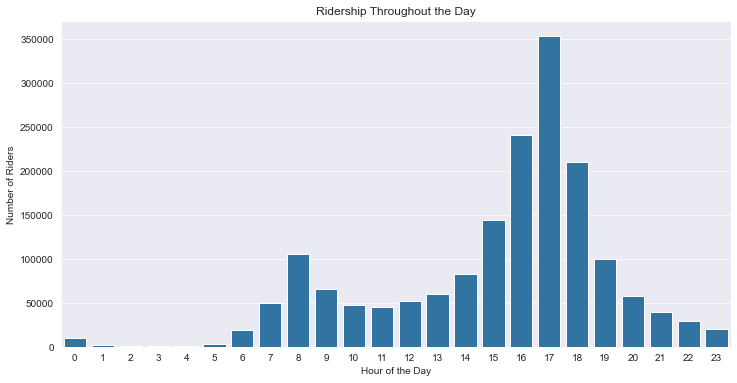

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df =test

# Convert string to datetime format and extract hour
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])
df['hour'] = df['transit_timestamp'].dt.hour


# Group by hour and count the number of riders
hourly_ridership = df.groupby('hour').sum('ridership')
hourly_ridership = hourly_ridership.reset_index()
hourly_ridership



plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_ridership, x='hour', y='ridership')
plt.title('Ridership Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Riders')
plt.show()


In [17]:
wed['transit_timestamp'] = pd.to_datetime(wed['transit_timestamp'])

# Filter rows with time between 4:00 AM and 9:00 AM
filtered_df = wed[(wed['transit_timestamp'].dt.time >= pd.to_datetime('11:00:00').time()) & 
                 (wed['transit_timestamp'].dt.time <= pd.to_datetime('12:00:00').time())]

filtered_df

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid,day
8,2023-01-28 11:00:00,R170,103 St (1),M,1,omny,232,0,40.799446,-73.968376,POINT (-73.96837615966797 40.79944610595703),2023-01-28T11:00:00R170103 St (1)M1omny,Saturday
35,2023-02-11 11:00:00,R254,110 St (6),M,6,omny,115,0,40.795021,-73.944252,POINT (-73.94425201416016 40.795021057128906),2023-02-11T11:00:00R254110 St (6)M6omny,Saturday
47,2022-07-16 11:00:00,N139,111 St (A),Q,A,omny,8,0,40.684330,-73.832161,POINT (-73.83216094970703 40.684329986572266),2022-07-16T11:00:00N139111 St (A)QAomny,Saturday
93,2022-09-24 11:00:00,R308,145 St (3),M,3,omny,34,0,40.820419,-73.936249,POINT (-73.93624877929688 40.82041931152344),2022-09-24T11:00:00R308145 St (3)M3omny,Saturday
107,2022-12-10 11:00:00,N202,"155 St (B,D)",M,"B,D",omny,15,0,40.830135,-73.938210,POINT (-73.9382095336914 40.830135345458984),"2022-12-10T11:00:00N202155 St (B,D)MB,Domny",Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630861,2023-08-26 11:00:00,R419,Zerega Av (6),BX,6,omny,33,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-08-26T11:00:00R419Zerega Av (6)BX6omny,Saturday
1630869,2023-04-22 12:00:00,R419,Zerega Av (6),BX,6,metrocard,16,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-04-22T12:00:00R419Zerega Av (6)BX6metrocard,Saturday
1630874,2022-09-10 12:00:00,R419,Zerega Av (6),BX,6,metrocard,47,1,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2022-09-10T12:00:00R419Zerega Av (6)BX6metrocard,Saturday
1630883,2023-02-11 12:00:00,R419,Zerega Av (6),BX,6,omny,15,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-02-11T12:00:00R419Zerega Av (6)BX6omny,Saturday


In [18]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Sample dataset

df = filtered_df

# Create a map centered around NYC
nyc_map = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

# Generate heatmap
heat_data = [[row['latitude'], row['longitude'], row['ridership']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(nyc_map)

# nyc_map.save("nyc_ridership_heatmap.html")


In [19]:

nyc_map.save("nyc_ridership_heatmap.html")

In [16]:
wed['transit_timestamp'] = pd.to_datetime(wed['transit_timestamp'])

# Filter rows with time between 4:00 AM and 9:00 AM
filtered_df = wed[(wed['transit_timestamp'].dt.time >= pd.to_datetime('15:00:00').time()) &
                  (wed['transit_timestamp'].dt.time <= pd.to_datetime('19:00:00').time())]

filtered_df
import folium
from folium.plugins import HeatMap
import pandas as pd

# Sample dataset

df = filtered_df

# Create a map centered around NYC
nyc_map = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

# Generate heatmap
heat_data = [[row['latitude'], row['longitude'], pow(row['ridership'],0.7)] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(nyc_map)

# nyc_map.save("nyc_ridership_heatmap.html")

nyc_map.save("nyc_ridership_heatmap_after.html")